In [1]:
import sys, os
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from skimage.filters import sobel

from watershed_segmentation import *

In [2]:
data_path = './data'

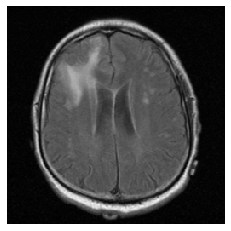

In [3]:
img = cv.imread(os.path.join(data_path, "TCGA_CS_4941_19960909_16.tif"))
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

2


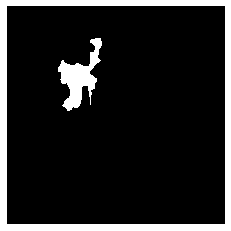

In [4]:
img_mask = cv.imread(os.path.join(data_path, "TCGA_CS_4941_19960909_16_mask.tif"))
# img_mask = cv.imread(os.path.join(data_path, "TCGA_CS_4941_19960909_1_mask.tif"))
print(len(np.unique(img_mask)))
img_mask = img_mask[:, :, 0] / 255

plt.imshow(img_mask, cmap="gray")
plt.axis("off")
plt.show()

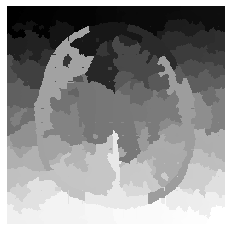

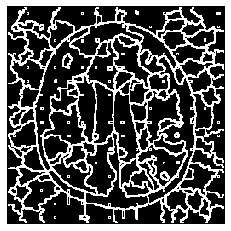

In [5]:
labels = skimage_watershed(img, markers=256)
plt.imshow(labels, cmap="gray")
plt.axis("off")
plt.show()

edges = sobel(labels)
edges[edges > 0] = 1
plt.imshow(edges, cmap="gray")
plt.axis("off")
plt.show()

In [6]:
watershed_kmeans = Watershed_Kmeans(n_clusters=5, n_markers_foreground=1000, n_markers_background=1000, random_state=100)
labels = watershed_kmeans.apply(img)

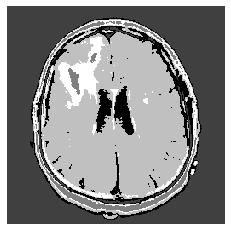

In [7]:
plt.imshow(watershed_kmeans.labels_kmeans, cmap="gray")
plt.axis("off")
plt.show()

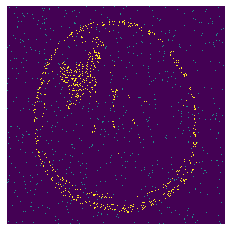

In [8]:
plt.imshow(watershed_kmeans.markers)
plt.axis("off")
plt.show()

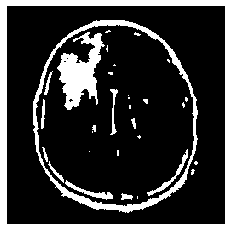

In [9]:
plt.imshow(labels, cmap="gray")
plt.axis("off")
plt.show()

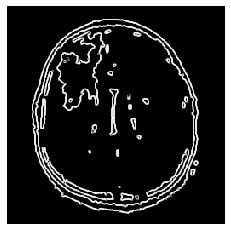

In [10]:
edges = sobel(labels)
plt.imshow(edges, cmap="gray")
plt.axis("off")
plt.show()

In [11]:
def markers_filter(markers, img, n_markers=100):
    center = np.array([img.shape[0] / 2, img.shape[1] / 2])
    pos = np.where(markers==2)
    distance = np.array([np.linalg.norm(np.array([pos[0][i], pos[1][i]]) - center) for i in range(len(pos[0]))])
    index_sorted = np.argsort(distance)[n_markers:]
    background_x, background_y = pos[0][index_sorted], pos[1][index_sorted]
    markers_copy = np.copy(markers)
    markers_copy[background_x, background_y] = 0
    return markers_copy

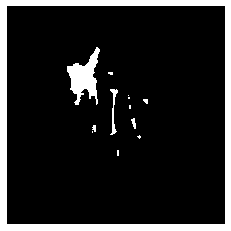

In [12]:
markers_updated = markers_filter(watershed_kmeans.markers, img, n_markers=100)

labels_filtered = skimage_watershed(sobel(img), markers=markers_updated)
plt.imshow(labels_filtered, cmap="gray")
plt.axis("off")
plt.show()

In [13]:
intersection = (labels_filtered - 1) * (img_mask)
union = (labels_filtered - 1) + (img_mask)
union[union > 1] = 1

score = intersection.sum() / union.sum()
print(score)

0.4648716870004207


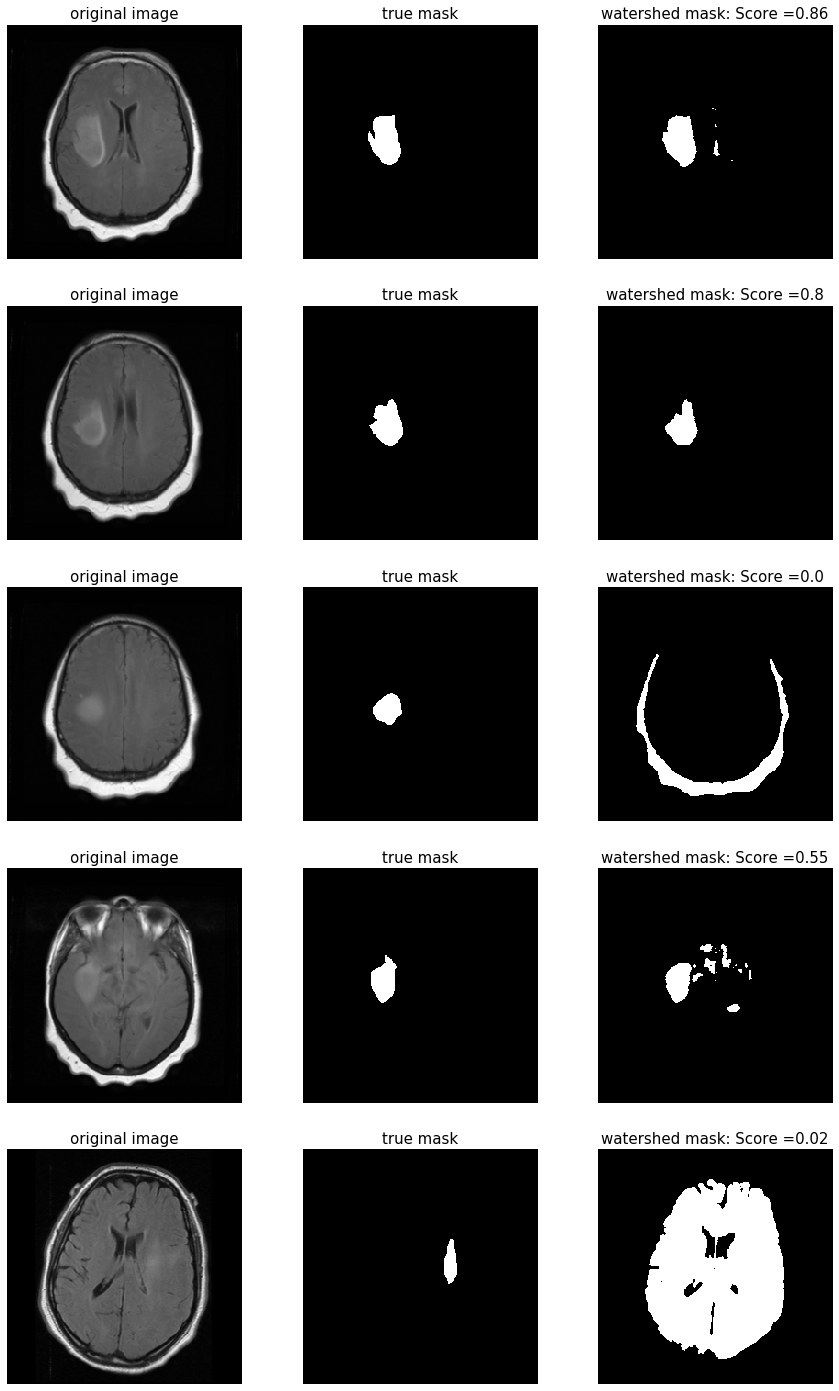

In [18]:
watershed_kmeans = Watershed_Kmeans(n_clusters=5, n_markers_foreground=1000, n_markers_background=1000, random_state=0)
mri_segmentaion = MRI_Segmentation(dataset_path='./data/kaggle_3m')
mri_segmentaion.run(watershed_kmeans, imgs_range=range(10, 15), plot=True, save_fig="outputs/results_3", save_score="outputs/score_3")

In [45]:
watershed_kmeans = Watershed_Kmeans(n_clusters=6, n_markers_foreground=1000, n_markers_background=1000, random_state=0)
mri_segmentaion = MRI_Segmentation(dataset_path='./data/kaggle_3m')
mri_segmentaion.run(watershed_kmeans, imgs_range=range(100), save_score="outputs/score_4")

Number of segmented imgs: 100


Number of images =  100
Mean score =  0.276
Standard deviation =  0.297


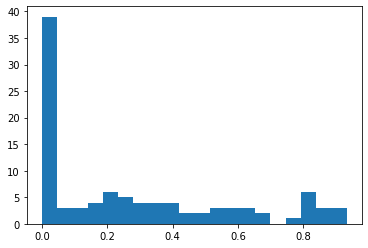

In [46]:
scores = np.load("outputs/score_4.npy",allow_pickle='TRUE').item()
print("Number of images = ", len(list(scores.values())))
print("Mean score = ", np.round(np.mean(list(scores.values())), 3))
print("Standard deviation = ", np.round(np.std(list(scores.values())), 3))
plt.figure()
plt.hist(list(scores.values()), bins=20)
plt.show()

In [19]:
watershed_kmeans = Watershed_Kmeans(n_clusters=5, n_markers_foreground=1000, n_markers_background=1000, random_state=0)
mri_segmentaion = MRI_Segmentation(dataset_path='./data/kaggle_3m')
mri_segmentaion.run(watershed_kmeans, save_score="outputs/score")

Number of segmented imgs: 100
Number of segmented imgs: 200
Number of segmented imgs: 300
Number of segmented imgs: 400
Number of segmented imgs: 500
Number of segmented imgs: 600
Number of segmented imgs: 700
Number of segmented imgs: 800
Number of segmented imgs: 900
Number of segmented imgs: 1000
Number of segmented imgs: 1100
Number of segmented imgs: 1200
Number of segmented imgs: 1300


Number of images =  1373
Mean score =  0.278
Standard deviation =  0.293


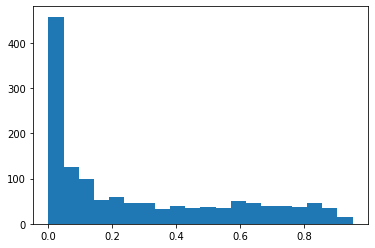

In [39]:
scores = np.load("outputs/score.npy",allow_pickle='TRUE').item()
print("Number of images = ", len(list(scores.values())))
print("Mean score = ", np.round(np.mean(list(scores.values())), 3))
print("Standard deviation = ", np.round(np.std(list(scores.values())), 3))
plt.figure()
plt.hist(list(scores.values()), bins=20)
plt.show()